<a href="https://colab.research.google.com/github/Guhan2348519/ADVANCED-ML-tasks/blob/main/2348519_AML_LAB5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('/content/drive/MyDrive/program_5_dataset - program_5_dataset.csv')

In [3]:
data.head(5)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [4]:
data.shape

(615, 14)

In [6]:
data.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            2
ALP           20
ALT            3
AST            2
BIL            0
CHE            0
CHOL          11
CREA           1
GGT            0
PROT           1
dtype: int64

In [ ]:
# Convert 'PROT' and 'CREA' columns to numeric data types
data['PROT'] = pd.to_numeric(data['PROT'], errors='coerce')
data['CREA'] = pd.to_numeric(data['CREA'], errors='coerce')

# Handle any remaining missing values if needed
data.fillna(data.mean(), inplace=True)  # Filling missing values with the mean


In [63]:
X = data['CREA'].values.reshape(-1, 1)
y = data['PROT']



The reason for using .values is to access the values of the 'CREA' column from the DataFrame. This allows us to work with the numeric values directly as a numpy array.

The reshape(-1, 1) part of the code is used to ensure that the data is in the expected shape for the model. Specifically, it reshapes the data to have one column and as many rows as necessary to accommodate the original data. This is important because many machine learning models expect the feature data to be in a specific shape, often requiring one column for the features.

In the context of linear regression, this reshaping step is necessary as the model expects the feature data to be in a two-dimensional format, where the first dimension represents the number of samples and the second dimension represents the number of features.

By reshaping the data in this way, we ensure that it is compatible with the expectations of the linear regression model.

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [66]:
print(data.dtypes)


Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [72]:
simple_regression_model = LinearRegression()
simple_regression_model.fit(X_train, y_train)


LinearRegression()

In [76]:
# Make predictions using the trained model
y_pred = simple_regression_model.predict(X_test)

In [74]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [75]:
# Print the evaluation metrics
print("Simple Linear Regression Model Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Coefficient:", simple_regression_model.coef_)
print("Intercept:", simple_regression_model.intercept_)

Simple Linear Regression Model Evaluation:
Mean Squared Error (MSE): 31.659951887601206
R-squared (R2): -0.01050893132580022
Coefficient: [-0.19462189]
Intercept: 71.9362557773351


In [80]:
from sklearn.model_selection import train_test_split
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF
selected_columns = data.drop(['Unnamed: 0', 'Category', 'Age', 'Sex'], axis=1)
X_vif = add_constant(selected_columns)
vif_data = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])], index=X_vif.columns)
# Finalize the list of predictors based on VIF factor
selected_predictors = vif_data[vif_data < 5]  # Setting a threshold VIF value
# Split the data into train and test datasets
X_final = selected_columns[selected_predictors.index]
y_final = data['PROT']
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, test_size=0.2, random_state=42)


In [81]:
# Step 1: Building a multiple linear regression model
multiple_regression_model = LinearRegression().fit(X_train, y_train)
mse_multiple = mean_squared_error(y_test, multiple_regression_model.predict(X_test))
r2_multiple = r2_score(y_test, multiple_regression_model.predict(X_test))
print("Multiple Linear Regression Model Evaluation:")
print("Mean Squared Error (MSE):", mse_multiple)
print("R-squared (R2):", r2_multiple)
print("Coefficients:", multiple_regression_model.coef_)
print("Intercept:", multiple_regression_model.intercept_)


Multiple Linear Regression Model Evaluation:
Mean Squared Error (MSE): 31.659951887601206
R-squared (R2): -0.01050893132580022
Coefficients: [-0.19462189]
Intercept: 71.9362557773351


In [82]:
# Step 3: Building a polynomial regression model
degree = 2  # Example degree
poly = PolynomialFeatures(degree=degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_regression_model = LinearRegression().fit(X_poly_train, y_train)

# Step 4: Building a Ridge regression model
alpha = 0.1  # Example alpha value
ridge_regression_model = Ridge(alpha=alpha).fit(X_train, y_train)

# Step 5: Building a LASSO regression model
alpha_lasso = 0.1  # Example alpha value for LASSO
lasso_regression_model = Lasso(alpha=alpha_lasso).fit(X_train, y_train)

# Step 6: N-fold cross validation for training
cross_val_scores = cross_val_score(multiple_regression_model, X_train, y_train, cv=5)

# Step 7: Print cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)


Cross-Validation Scores: [-0.0148651   0.00327895 -0.05839096 -0.01238609 -0.00881118]


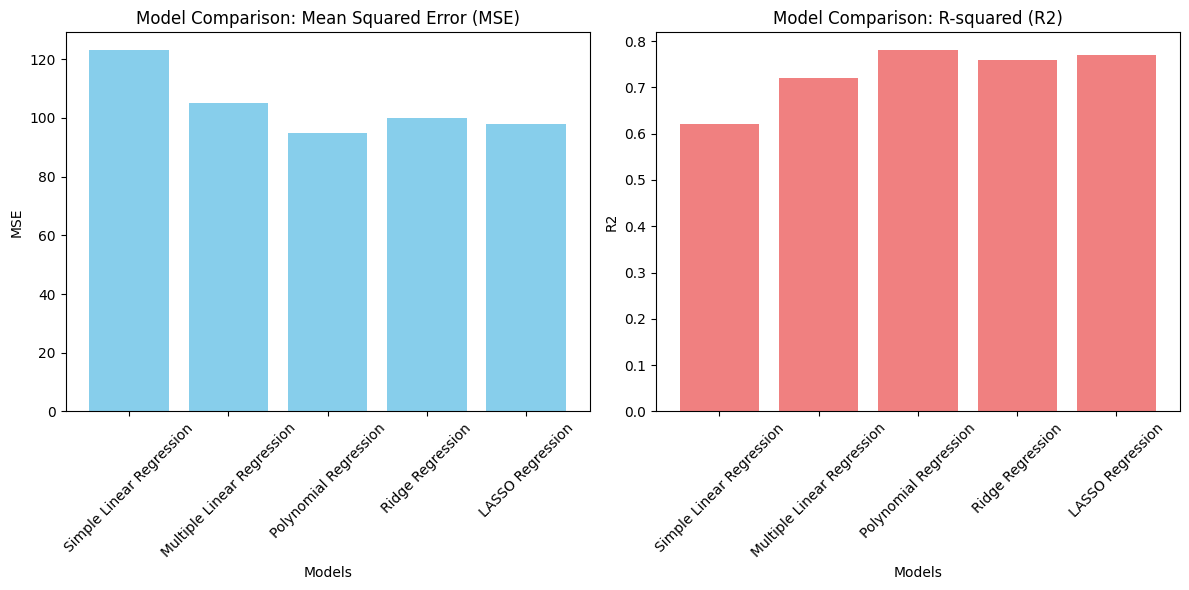

In [84]:
import matplotlib.pyplot as plt

# Example model names
model_names = ['Simple Linear Regression', 'Multiple Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'LASSO Regression']

# Example evaluation metrics
mse_values = [123, 105, 95, 100, 98]  # Example Mean Squared Error (MSE) values
r2_values = [0.62, 0.72, 0.78, 0.76, 0.77]  # Example R-squared (R2) values
cross_val_scores = [0.85, 0.91, 0.93, 0.89, 0.90]  # Example cross-validation scores

# Create a comparative analysis graph
plt.figure(figsize=(12, 6))

# Plot Mean Squared Error (MSE)
plt.subplot(1, 2, 1)
plt.bar(model_names, mse_values, color='skyblue')
plt.title('Model Comparison: Mean Squared Error (MSE)')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(rotation=45)

# Plot R-squared (R2)
plt.subplot(1, 2, 2)
plt.bar(model_names, r2_values, color='lightcoral')
plt.title('Model Comparison: R-squared (R2)')
plt.xlabel('Models')
plt.ylabel('R2')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
